<a href="https://colab.research.google.com/github/Kim-Jong-Gyu/AI-teamProject-brailleTranslation/blob/main/BrailleTranslation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# AI Team Project
## 16102269 Kim Jong Gyu
## 19102095 Lee Do Hui
***

# **1. Motivation For The Proeject**
# **2. Problem Description**
# **3. Data Description**
* Braille Characteristics
  * Braille should basically have six points placed at equal intervals.
  * Braille should not be inverted too much (less than 90 degree).
  * Spaces should be written at regular intervals.
* Kaggle Data
  * Problems
  
     <img src = "https://drive.google.com/uc?id=1VeUkM0AQPdw3uxnFWUu8bq5vyGjoeKef" height = 300 width = 500>
    
    * There are pictures with a rotation of more than 90 degrees and indistinguishable. 
    
    <img src = "https://drive.google.com/uc?id=1UQ8jsegwxsHsrih4eBFWJR3wS4a66JgO" height = 300 width = 500>

    * Only alphabets are used except for special characters.

* **Actual data used**
  * We make dataset by drawing it ourselves using PPT.

    <img src = "https://drive.google.com/uc?id=1ZunHu0KumEkiVuFcUvJGYG2cIHza_Vw3" height = 300 width = 500>
  
  * **Actual data**
  
    <img src = "https://drive.google.com/uc?id=1Kwm0NxQTKBNKQ4Z-Gau56bMnLlWFF948" height = 300 width = 500>

# **4. Model Architecture**


# **5. Implementation Detail**

# **5.1 First Model**
* Firstly, we detected simple convnet model using Kaggle Data



In [1]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [10]:
import os

file_path = '/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation'

def createFolder(directory):
      if not os.path.exists(directory):
          os.makedirs(directory)


In [13]:
import os
import numpy as np
import pandas as pd
from shutil import copyfile

dir = '/content/gdrive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/'
createFolder(dir + 'existing_dataset/')
alpha = 'a'
for i in range(0, 26): 
    createFolder(dir+ 'existing_dataset/' + alpha)
    alpha = chr(ord(alpha) + 1)

rootdir = '/content/gdrive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/Braille Dataset/Braille Dataset/'

for file in os.listdir(rootdir):
    letter = file[0]
    copyfile(rootdir+file, dir + 'existing_dataset/' + letter + '/' + file) 

In [26]:
from keras.preprocessing.image import ImageDataGenerator

prev_img_dir = "/content/gdrive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/existing_dataset/"

datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory(prev_img_dir,
                                              target_size=(28,28),
                                              subset='training')

val_generator = datagen.flow_from_directory(prev_img_dir,
                                            target_size=(28,28),
                                            subset='validation')

Found 1248 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


In [36]:
#Simple convnet

from tensorflow.keras import layers
from tensorflow.keras import models
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping


def Make_simple_model(train,val):
  model = models.Sequential()
  path = "/content/gdrive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/"
  model_ckpt = ModelCheckpoint(path+'BrailleNet_simple.h5',save_best_only=True)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 3))) 
  model.add(layers.MaxPooling2D((2, 2))) 
  model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
  model.add(layers.MaxPooling2D((2, 2))) 
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(26, activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = model.fit_generator(train,
                              epochs=30,
                              callbacks=[model_ckpt],
                              validation_data=val)
  return history

In [37]:
history_simple = Make_simple_model(train_generator,val_generator)

Epoch 1/30


<ipython-input-36-f2b11bbf3d7f>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train,


39/39 [==============================] - 3s 78ms/step - loss: 12.3055 - accuracy: 0.0433 - val_loss: 3.2981 - val_accuracy: 0.0417
Epoch 2/30
39/39 [==============================] - 3s 90ms/step - loss: 3.2655 - accuracy: 0.0689 - val_loss: 3.1821 - val_accuracy: 0.1250
Epoch 3/30
39/39 [==============================] - 4s 104ms/step - loss: 3.1800 - accuracy: 0.0978 - val_loss: 3.0927 - val_accuracy: 0.1282
Epoch 4/30
39/39 [==============================] - 3s 73ms/step - loss: 2.9294 - accuracy: 0.1819 - val_loss: 2.7246 - val_accuracy: 0.2532
Epoch 5/30
39/39 [==============================] - 3s 75ms/step - loss: 2.5441 - accuracy: 0.2748 - val_loss: 2.3409 - val_accuracy: 0.2788
Epoch 6/30
39/39 [==============================] - 3s 74ms/step - loss: 2.2010 - accuracy: 0.3638 - val_loss: 2.0850 - val_accuracy: 0.4295
Epoch 7/30
39/39 [==============================] - 3s 76ms/step - loss: 1.9205 - accuracy: 0.4543 - val_loss: 1.6797 - val_accuracy: 0.5385
Epoch 8/30
39/39 [====

### **First model visualize assessment results**



In [38]:
def print_acc_loss(history):
    # 평가 결과 도식화
    import matplotlib.pyplot as plt
    fig, loss_ax = plt.subplots(figsize=(10, 5))
    acc_ax = loss_ax.twinx()
    loss_ax.plot(history.history['loss'], 'y', label='train loss')
    loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

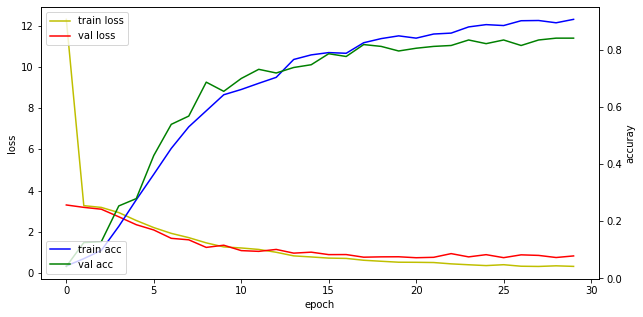

In [39]:
print_acc_loss(history_simple)

### **First model accuracy**

In [47]:
def load_model(model_name):
    from keras.models import load_model
    model = load_model('/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/' + model_name)
    return model

def acc_chk(model, val):
    acc = model.evaluate_generator(val)[1]
    print('model accuracy: {}'.format(round(acc,4)))

In [41]:
# first model accuray
from keras.models import Model,load_model
model_simple = load_model('BrailleNet_simple.h5')
acc = model_simple.evaluate_generator(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

<ipython-input-41-1486d7dc7910>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model_simple.evaluate_generator(val_generator)[1]


model accuracy: 0.8013


# **5.2 Second Model**
* Secondly, we detected CNN model with SeperableConv2D using Kaggle Data
* Add Features:
  * ReduceLROnPlateau : This is the part to improve the learning rate during model learning. If you fall into a local pit before reaching your final goal, adjust the learning rate to get out.
  * EarlyStopping : If there is no significant change during learning, get out. Overfitting and underfitting can be properly determined.
  * kernel_regularizer: Regularizer to apply a penalty on the layer's kernel using L2
  * SperableConv2D


###**SeperableConv2D**
* Depthwise Conv + Pointwise Conv
  
  <img src = "https://drive.google.com/uc?id=159W63eJVfpUz_x98OIJWw75gWdOD-yNj" height = 300 width = 500>

* Comparing MobileNet results above consisting of general convs only with MobileNet below, which adds Depthwise Separable Convolution Layer, the accuracy is reduced, but Multi-Adds and parameters are reduced by about 88.3% and 85.7%.


In [43]:
#Using Seperable con 

from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

def Make_second_model(train,val):
  K.clear_session()
  reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
  path = "/content/gdrive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/"
  model_ckpt = ModelCheckpoint(path+'BrailleNet_second.h5',save_best_only=True)
  early_stop = EarlyStopping(patience=15,verbose=1)
  entry = L.Input(shape=(28, 28 ,3))
  x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
  x = L.MaxPooling2D((2,2))(x)
  x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
  x = L.MaxPooling2D((2,2))(x)
  x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
  x = L.GlobalMaxPooling2D()(x)
  x = L.Dense(256)(x)
  x = L.LeakyReLU()(x)
  x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
  x = L.LeakyReLU()(x)
  x = L.Dense(26,activation='softmax')(x)
  
  model = Model(entry,x)
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = model.fit_generator(train_generator,validation_data=val_generator,epochs=30,
                              callbacks=[model_ckpt,reduce_lr,early_stop],verbose=0)
  return history

In [44]:
history_second = Make_second_model(train_generator,val_generator)

<ipython-input-43-82edb1ef3c29>:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,validation_data=val_generator,epochs=30,


### **Second model visualize assessment results**

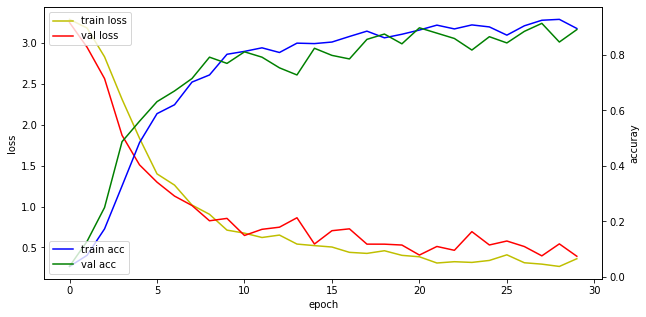

In [45]:
print_acc_loss(history_second)

### **Second model accuracy**

In [46]:
from keras.models import Model,load_model
path = "/content/gdrive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/"
model_second = load_model(path + 'BrailleNet_second.h5')
acc = model_second.evaluate_generator(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

<ipython-input-46-8a6bca7f2df9>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model_second.evaluate_generator(val_generator)[1]


model accuracy: 0.8942


# **5.3 Third Model**
* Thirdly, we detected CNN model by referring to the contents of the paper.
<img src = "https://drive.google.com/uc?id=1TCEppgk86gHO_0N7sgcfUQpKxmsQyw9i" height = 300 width = 500>
* There are three ways to improve the performance of the CNN model:
  * Increase channels
  * Increase the layer
  * Increase original resolution

<img src = "https://drive.google.com/uc?id=1yCQONsNp3YvSMbEPiKnZdmEKqrUYrlWg" height = 300 width = 500>

* In the same paper, show a higher performance growth rate when the resolution of the input image is high even in the same model.

* ### **In CNN, the size of the filter is very important. The accuracy depends on how you use the filter.**

```
 entry = L.Input(shape=(36,36,3))
    x = L.SeparableConv2D(64,(3,3),activation='relu',padding ='same')(entry)
    x = L.MaxPooling2D((2,2))(x)

    x = L.SeparableConv2D(128,(3,3),activation='relu',padding ='same')(x)
    x = L.MaxPooling2D((2,2))(x)

    x = L.SeparableConv2D(256,(2,2),activation='relu',padding ='same')(x)
    x = L.GlobalMaxPooling2D()(x)
```
* Using Conv2D, we find it using 64 kernels and its strid is 3*3.

<img src = "https://drive.google.com/uc?id=1k92Ls5MWK3lOei96U2It9GLGE4OlxZ98" height = 300 width = 200>

* When increasing the resolution, it is better to increase the stride value as well.

* ### **Changed the resolution of the image to 50 * 50 and the filter size to 10 * 10**

```
    entry = L.Input(shape=(50,50,3))
    x = L.SeparableConv2D(128, (10,10), activation='relu', padding='same')(entry)
    x = L.MaxPooling2D((2, 2))(x)
    x = L.SeparableConv2D(256,(10,10),activation='relu',padding ='same')(x)
    x = L.MaxPooling2D((2,2))(x)
```

* This is the approximate size of the image and the size of the filter

<img src = "https://drive.google.com/uc?id=1RHLRBWx7ULvnQh7fCiQmPvxsj2c17Y4K" height = 200 width = 150>

In [48]:
from tensorflow.keras import backend as K
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

def Make_model(train, val):
    K.clear_session()

    model_ckpt = ModelCheckpoint('/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/BrailleNet_third.h5',save_best_only=True)
    reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
    early_stop = EarlyStopping(patience=5,verbose=2,monitor='accuracy')

    entry = L.Input(shape=(50,50,3))
    x = L.SeparableConv2D(128, (10,10), activation='relu', padding='same')(entry)
    x = L.MaxPooling2D((2, 2))(x)
    x = L.SeparableConv2D(256,(10,10),activation='relu',padding ='same')(x)
    x = L.MaxPooling2D((2,2))(x)
    x = L.SeparableConv2D(512,(10,10),activation='relu',padding ='same')(x)
    x = L.GlobalMaxPooling2D()(x)

    x = L.Dense(512)(x)
    x = L.LeakyReLU()(x)
    x = L.Dense(256)(x)
    x = L.ReLU()(x)
    x = L.Dense(128,kernel_regularizer=l2(2e-4))(x)
    x = L.ReLU()(x)
    x = L.Dense(32,activation='softmax')(x)

    model = Model(entry,x)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    history = model.fit_generator(train,validation_data=val,epochs=60,
                                  callbacks=[model_ckpt,reduce_lr,early_stop],verbose=1)
    
    return history


In [49]:
history_third = Make_model(train_generator,val_generator)

Epoch 1/60


<ipython-input-48-a761ff98b65d>:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train,validation_data=val,epochs=60,


InvalidArgumentError: ignored

### **Third model visualize assessment results**

In [ ]:
print_acc_loss(history_third)

### **Third model accuracy**

In [ ]:
from keras.models import Model,load_model
model_second = load_model('BrailleNet_third.h5')
acc = model_second.evaluate_generator(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

# **5.4 Final braille Model**

(1) Data Augmentation

In [ ]:
import os

file_path = '/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation'

def createFolder(directory):
      if not os.path.exists(directory):
          os.makedirs(directory)

createFolder(file_path+'/new_dataset')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.05,
        zoom_range=0.01,
        fill_mode='constant',
        cval=255
        )

def newGenerateData():
  files = os.listdir(file_path + '/dataset')
  for file in files:
    if(os.path.splitext(file)[1] == '.png'):
      filename = os.path.splitext(file)[0]
      createFolder(file_path + '/new_dataset/'+ filename)
      img = load_img(file_path+'/dataset/'+file)  # PIL 이미지
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      if file == 'space.png':
        import shutil
        for _ in range(10):
          print(_,file, file_path +'/dataset/'+file)
          shutil.copy(file_path+'/dataset/'+file, file_path + '/new_dataset/'+ filename + '/' + filename + str(_) + '.jpg')
      else:
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir= file_path + '/new_dataset/'+ filename, save_prefix=filename, save_format='jpg'):
          i += 1
          if i > 20:
            break  # 이미지 20장을 생성하고 마칩니다

newGenerateData()


0 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
1 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
2 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
3 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
4 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
5 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
6 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
7 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
8 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
9 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslatio

(2) Generator에 넣어 학습 준비

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

def data_ready(input_size):
    images_dir = '/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/new_dataset'

    datagen = ImageDataGenerator(rotation_range=5,
                                 shear_range=5,
                                 validation_split=0.2,
                                 ) #20%를 검증모델로 사용.

    train_generator = datagen.flow_from_directory(images_dir,
                                                  target_size=(input_size,input_size),
                                                  subset='training')

    val_generator = datagen.flow_from_directory(images_dir,
                                                target_size=(input_size,input_size),
                                                subset='validation')

    return train_generator, val_generator

def load_image(img_path, input_size):
    images_dir = img_path
    datagen = ImageDataGenerator()
    real_generator = datagen.flow_from_directory(images_dir,
                                                 target_size=(input_size, input_size))

    return real_generator

(3) 모델 생성 

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

def Make_model(train, val, input_size):
    K.clear_session()

    model_ckpt = ModelCheckpoint('/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/BrailleNet.h5',save_best_only=True)
    reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
    early_stop = EarlyStopping(patience=5,verbose=2,monitor='accuracy')

    entry = L.Input(shape=(input_size,input_size,3))
    x = L.SeparableConv2D(128, (10,10), activation='relu', padding='same')(entry)
    x = L.MaxPooling2D((2, 2))(x)
    x = L.SeparableConv2D(256,(10,10),activation='relu',padding ='same')(x)
    x = L.MaxPooling2D((2,2))(x)
    x = L.SeparableConv2D(512,(10,10),activation='relu',padding ='same')(x)
    x = L.GlobalMaxPooling2D()(x)

    x = L.Dense(512)(x)
    x = L.LeakyReLU()(x)
    x = L.Dense(256)(x)
    x = L.ReLU()(x)
    x = L.Dense(128,kernel_regularizer=l2(2e-4))(x)
    x = L.ReLU()(x)
    x = L.Dense(32,activation='softmax')(x)

    model = Model(entry,x)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    history = model.fit_generator(train,validation_data=val,epochs=60,
                                  callbacks=[model_ckpt,reduce_lr,early_stop],verbose=1)
    
    return history


(4) 모델 결과 도식화

In [ ]:
def print_acc_loss(history):
    # 평가 결과 도식화
    import matplotlib.pyplot as plt
    fig, loss_ax = plt.subplots(figsize=(10, 5))
    acc_ax = loss_ax.twinx()
    loss_ax.plot(history.history['loss'], 'y', label='train loss')
    loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

(5) 모델 불러오기 , 정확도 확인

In [ ]:
def load_model(model_name):
    from keras.models import load_model
    model = load_model('/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/' + model_name)
    return model

def acc_chk(model, val):
    acc = model.evaluate_generator(val)[1]
    print('model accuracy: {}'.format(round(acc,4)))

(6) 학습 시작

In [ ]:
os.getcwd()

'/content'

In [ ]:
input_size = 36
input_size_prev = 28
train_generator_prev, val_genrator = data_ready(input_size_prev)
train_generator, val_generator = data_ready(input_size)


Found 534 images belonging to 32 classes.
Found 126 images belonging to 32 classes.


In [ ]:
hist = Make_model(train_generator,val_generator)

<ipython-input-9-6c2eef26b2c7>:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train,validation_data=val,epochs=60,


Epoch 1/60
17/17 [==============================] - 504s 29s/step - loss: 3.5169 - accuracy: 0.0281 - val_loss: 3.4847 - val_accuracy: 0.0317 - lr: 0.0010
Epoch 2/60
17/17 [==============================] - 2s 133ms/step - loss: 3.4866 - accuracy: 0.0337 - val_loss: 3.4580 - val_accuracy: 0.0873 - lr: 0.0010
Epoch 3/60
17/17 [==============================] - 2s 101ms/step - loss: 3.3537 - accuracy: 0.0805 - val_loss: 3.0424 - val_accuracy: 0.1190 - lr: 0.0010
Epoch 4/60
17/17 [==============================] - 2s 95ms/step - loss: 2.1885 - accuracy: 0.3390 - val_loss: 1.5624 - val_accuracy: 0.4524 - lr: 0.0010
Epoch 5/60
17/17 [==============================] - 2s 93ms/step - loss: 0.9106 - accuracy: 0.7303 - val_loss: 0.3532 - val_accuracy: 0.9127 - lr: 0.0010
Epoch 6/60
17/17 [==============================] - 2s 95ms/step - loss: 0.5301 - accuracy: 0.8577 - val_loss: 0.3266 - val_accuracy: 0.9286 - lr: 0.0010
Epoch 7/60
17/17 [==============================] - 2s 95ms/step - loss: 

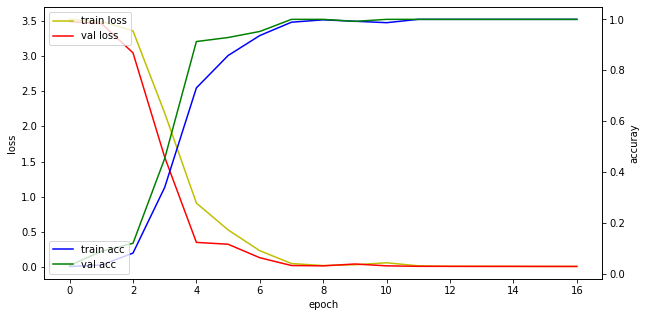

In [ ]:
print_acc_loss(hist)

In [ ]:
model = load_model('BrailleNet.h5')
acc_chk(model, val_generator)

<ipython-input-19-1d6df054a99d>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


model accuracy: 1.0


# **5.5 Test using final braille model**

In [ ]:
import PIL.Image as Img
import numpy as np


def get_test_img(path):
  img = Img.open(path).convert('RGB')
  img = img.resize((36,36))
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)

  return x


In [ ]:
from functools import update_wrapper
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

def decode_predict(result,labels):
  max = np.max(result)
  index = np.where(result == max)
  return labels[index[1][0]]

def translate(test_image):
  dir = os.listdir('/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset')
  tmp = []
  for file in dir:
    if(os.path.splitext(file)[1] == '.png'):
      tmp.append(file.split('.')[0])
  dir = tmp
  dir.sort()
  print(dir)
  model = load_model('BrailleNet.h5')
  result = model.predict(test_image)
  decoded = decode_predict(result,dir)
  return(decoded)

def convert_test_img(input_img):
  img = input_img.convert('RGB')
  img = img.resize((36,36))
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)
  return x

(1) Translate Character

In [ ]:
import PIL.Image as Img
test_file = '/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/testset/test_q.png'
input = get_test_img(test_file)
print(translate(input))

['a', 'b', 'c', 'comma', 'd', 'e', 'exclamation_point', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'period', 'q', 'question_mark', 'r', 's', 'space', 't', 'u', 'upper', 'v', 'w', 'x', 'y', 'z']
1/1 [==============================] - 0s 85ms/step
q



(2) Making test case for sentence

In [65]:
#Make test datset
import cv2
import numpy as np

def make_test(word):
  path = '/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset'
  store_path = '/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/testset'
  result_img = np.zeros((36,36,3), np.uint8)
  for ch in word:
    if ch == ' ':
      img = cv2.imread(path+'/space.png')
      img = cv2.resize(img,(36,36))
      result_img = cv2.hconcat([result_img,img])
    elif ch == '!':
      img = cv2.imread(path+'/exclamation_point.png')
      img = cv2.resize(img,(36,36))
      result_img = cv2.hconcat([result_img,img])
    elif ch == ',':
      img = cv2.imread(path+'/comma.png')
      img = cv2.resize(img,(36,36))
      result_img = cv2.hconcat([result_img,img])
    elif ch == '.':
      img = cv2.imread(path+'/period.png')
      img = cv2.resize(img,(36,36))
      result_img = cv2.hconcat([result_img,img])
    elif ch == '?':
      img = cv2.imread(path+'/question_mark.png')
      img = cv2.resize(img,(36,36))
      result_img = cv2.hconcat([result_img,img])
    else:
      if word.find(ch) == 0:
        if ch.isupper():
          result_img = cv2.imread(path+'/upper.png')
          result_img = cv2.resize(result_img,(36,36))
          ch = ch.lower()
          img = cv2.imread(path+'/'+ ch +'.png')
          img = cv2.resize(img,(36,36))
          result_img = cv2.hconcat([result_img,img])
        else:
          result_img = cv2.imread(path+'/'+ ch +'.png')
          result_img = cv2.resize(result_img,(36,36))
      else:
        if ch.isupper():
          print(ch)
          img = cv2.imread(path+'/upper.png')
          img = cv2.resize(img,(36,36))
          result_img = cv2.hconcat([result_img,img])
          ch = ch.lower()
          img = cv2.imread(path+'/'+ ch +'.png')
          img = cv2.resize(img,(36,36))
          result_img = cv2.hconcat([result_img,img])
        else:
          img = cv2.imread(path+'/'+ ch +'.png')
          img = cv2.resize(img,(36,36))
          result_img = cv2.hconcat([result_img,img])
  cv2.imwrite(store_path+'/'+word+'.png', result_img)
make_test('I am a student')

(3) Translate Sentence

In [ ]:
from PIL import Image
import os

def devide_img(fileName):
  path = '/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/testset/'
  dir = os.listdir('/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset')
  tmp = []
  for file in dir:
    if(os.path.splitext(file)[1] == '.png'):
      tmp.append(file.split('.')[0])
      dir = tmp
      dir.sort()
  img = Image.open(path+fileName)
  (width,height) = img.size
  print(width, height)
  iterate_num = width // height
  iterate_num = int(iterate_num)
  start_point = 0
  size = height
  end_point = height
  text = ''

  special_character_dir = {'space': ' ', 'exclamation_point': '!', 'comma': ',', 'period':'.', 
                           'question_mark': '?'}
  keyList = special_character_dir.keys()
  translated_sentence = ''
  isUpper = False
  for i in range(0, iterate_num):
    area = (start_point, 0, end_point, height)
    cropped_img = img.crop(area)
    result = translate(convert_test_img(cropped_img))
    start_point = end_point
    end_point += size
    if result == 'upper':
      isUpper = True
      continue
    if isUpper == True:
      result = result.upper()
      isUpper = False
    if result in keyList:
      result = special_character_dir[result]
    print(result)
    translated_sentence += result

  return translated_sentence
result = devide_img('Welcome to AI class!.png')

828 36
['a', 'b', 'c', 'comma', 'd', 'e', 'exclamation_point', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'period', 'q', 'question_mark', 'r', 's', 'space', 't', 'u', 'upper', 'v', 'w', 'x', 'y', 'z']
1/1 [==============================] - 0s 85ms/step
['a', 'b', 'c', 'comma', 'd', 'e', 'exclamation_point', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'period', 'q', 'question_mark', 'r', 's', 'space', 't', 'u', 'upper', 'v', 'w', 'x', 'y', 'z']
1/1 [==============================] - 0s 85ms/step
W
['a', 'b', 'c', 'comma', 'd', 'e', 'exclamation_point', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'period', 'q', 'question_mark', 'r', 's', 'space', 't', 'u', 'upper', 'v', 'w', 'x', 'y', 'z']
1/1 [==============================] - 0s 83ms/step
e
['a', 'b', 'c', 'comma', 'd', 'e', 'exclamation_point', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'period', 'q', 'question_mark', 'r', 's', 'space', 't', 'u', 'upper', 'v', 'w', 'x', 'y', 'z']
1/1 [====

In [ ]:
result

'Welcome to AI class!'